In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import noise
import random
from heapq import heappop, heappush

# Function to generate 2D Perlin noise
def generate_perlin_noise(shape, scale=100.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=None):
    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=octaves,
                                        persistence=persistence,
                                        lacunarity=lacunarity,
                                        repeatx=1024,
                                        repeaty=1024,
                                        base=seed)
    return world


In [2]:
# Define the terrain with three colors: blue (water), green (grass), yellow (sand)
grid_size = (50, 50)  # Increase the grid size
terrain_density = [0.4, 0.3, 0.3]  # Adjust the density for each color

# Generate a random seed
seed = random.randint(0, 1000)

# Generate 2D Perlin noise for the terrain with the random seed
terrain_noise = generate_perlin_noise(grid_size, scale=10.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=seed)

# Normalize the noise values to be between 0 and 1
terrain_noise = (terrain_noise - np.min(terrain_noise)) / (np.max(terrain_noise) - np.min(terrain_noise))

# Categorize the terrain based on noise values and density
terrain = np.zeros(grid_size, dtype=int)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if terrain_noise[i, j] < terrain_density[0]:
            terrain[i, j] = 0  # Blue (Water)
        elif terrain_noise[i, j] < terrain_density[0] + terrain_density[1]:
            terrain[i, j] = 1  # Green (Grass)
        else:
            terrain[i, j] = 2  # Yellow (Sand)

# Assign weights to terrain types
water_weight = 3
grass_weight = 1
sand_weight = 2

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if terrain[i, j] == 0:  # Water
            terrain[i, j] = water_weight
        elif terrain[i, j] == 1:  # Grass
            terrain[i, j] = grass_weight
        else:  # Sand
            terrain[i, j] = sand_weight


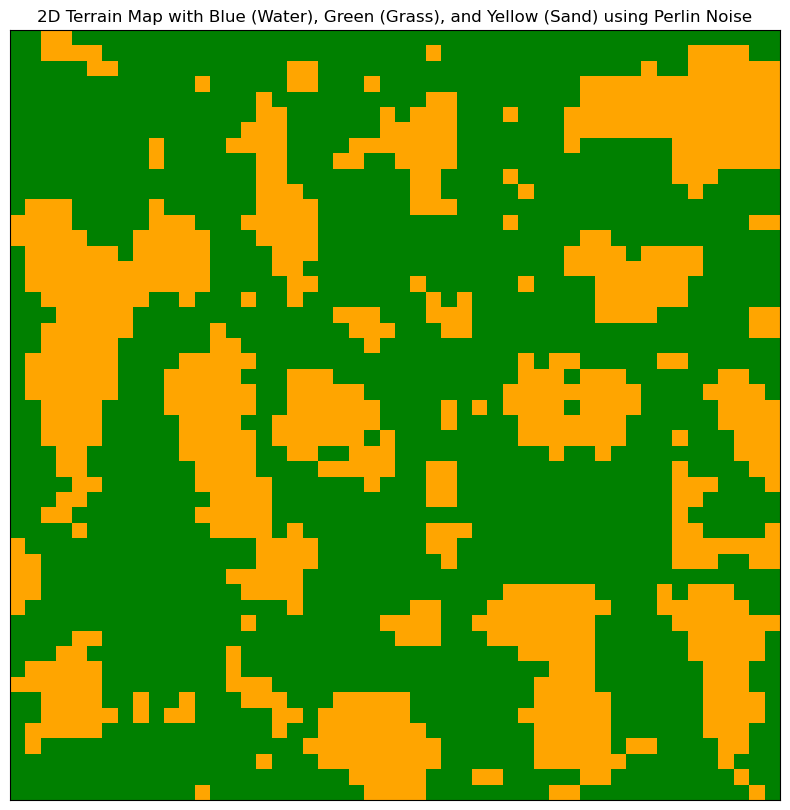

In [7]:
# Define custom colormap for blue, green, and yellow
colors = ['blue', 'green', 'orange']
custom_cmap = ListedColormap(colors)

# Visualize the terrain with custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(terrain, cmap=custom_cmap, origin='upper', interpolation='none', vmin=0, vmax=3)

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.title('2D Terrain Map with Blue (Water), Green (Grass), and Yellow (Sand) using Perlin Noise')
plt.show()


In [8]:
def astar_with_weights(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    weights_along_path = {start: [grid[start[0], start[1]]]}
    all_paths = []
    iterations = 0

    while open_set:
        current_cost, current_node = heappop(open_set)
        iterations += 1

        if current_node == goal:
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

            total_cost = sum(grid[node[0], node[1]] for node in path)
            weights_str = " + ".join(map(str, weights_along_path[goal]))

            print("-------------------------- Shortest Path Weighted -----------------------------")
            print(f"Number of iterations: {iterations}")
            num_steps = len(path) - 1
            print(f"Number of steps: {num_steps}")
            print(f'Total cost = {total_cost}')
            print("-------------------------------------------------------------------------------")

            return path, total_cost, weights_along_path, all_paths

        for neighbor in neighbors(current_node, rows, cols, grid):
            weight = grid[neighbor[0], neighbor[1]]
            new_cost = cost_so_far[current_node] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(goal, neighbor)
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                weights_along_path[neighbor] = weights_along_path[current_node] + [weight]
                iterations += 1

    print("No path found.")
    return [], float('inf'), {}, all_paths


In [9]:
def neighbors(node, rows, cols, grid):
    row, col = node
    neighbors = []
    if row > 0 and grid[row - 1, col] == 0:
        neighbors.append((row - 1, col))
    if row < rows - 1 and grid[row + 1, col] == 0:
        neighbors.append((row + 1, col))
    if col > 0 and grid[row, col - 1] == 0:
        neighbors.append((row, col - 1))
    if col < cols - 1 and grid[row, col + 1] == 0:
        neighbors.append((row, col + 1))
    return neighbors

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def reconstruct_path(came_from, start, goal):
    current = goal
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


In [11]:
# Visualize the grid and the optimal paths with adjusted figure size
plt.figure(figsize=(11, 11))
plt.imshow(grid, cmap='gray', origin='upper', interpolation='none', vmin=0, vmax=3)

plt.scatter(*start_point, color='green', marker='o', s=100, label='Start')
plt.scatter(*goal_point, color='red', marker='x', s=100, label='Goal')

# Plot the shortest path with least steps in yellow
shortest_path_least_steps, _ = astar_with_weights(start_point, goal_point, grid)
shortest_path_least_steps_x, shortest_path_least_steps_y = zip(*shortest_path_least_steps)
plt.plot(shortest_path_least_steps_y, shortest_path_least_steps_x, color='aqua', linewidth=2, label='Shortest Path with Least Steps')

# ... (existing code)

plt.legend()
plt.title('A* Pathfinding Algorithm with Terrain Weights')
plt.show()


NameError: name 'grid' is not defined

<Figure size 1100x1100 with 0 Axes>